In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
df = pd.read_csv("/content/loan dataset.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [5]:
df.shape

(614, 13)

In [6]:
df.Gender.value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

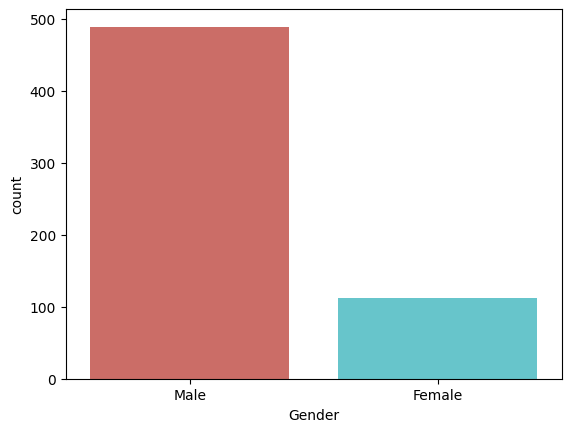

In [7]:
sns.countplot(x="Gender", data=df, palette="hls")
plt.show()

In [8]:
df.Married.value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

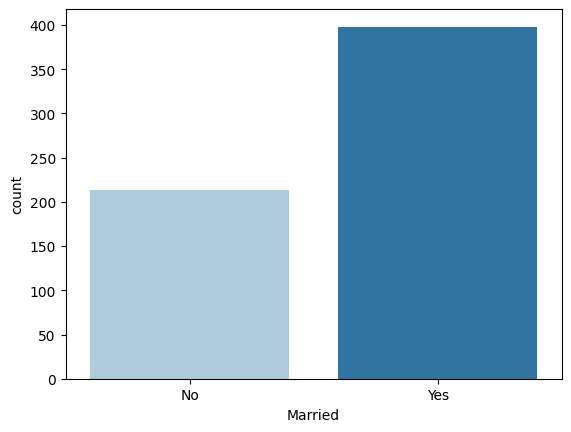

In [9]:
sns.countplot(x="Married", data=df, palette="Paired")
plt.show()

In [10]:
df.Education.value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

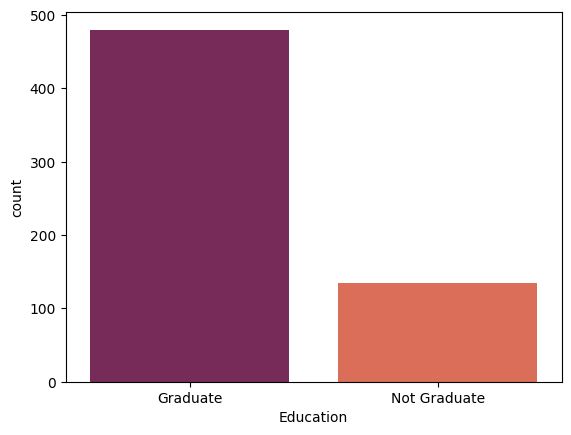

In [11]:
sns.countplot(x="Education", data=df, palette="rocket")
plt.show()

In [12]:
df.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

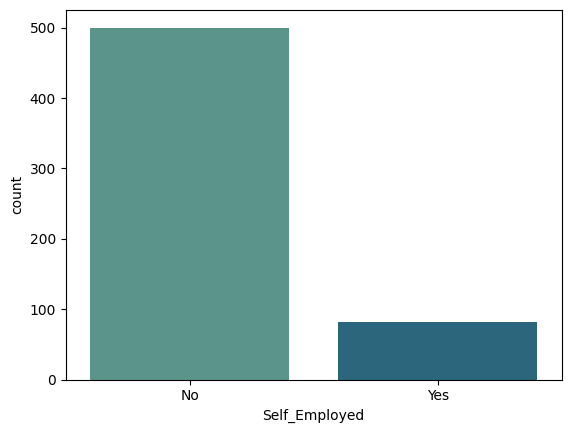

In [13]:
sns.countplot(x="Self_Employed", data=df, palette="crest")
plt.show()

In [14]:
df.Credit_History.value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

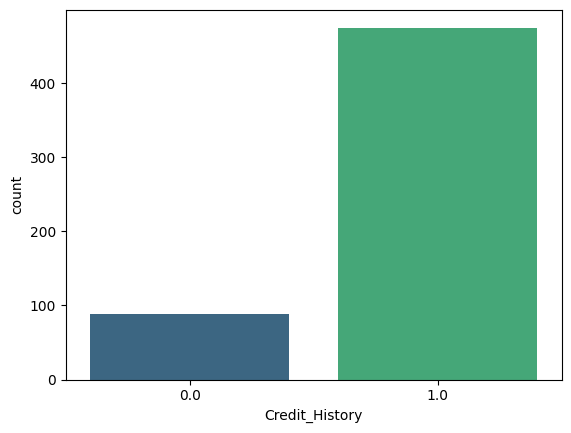

In [15]:
sns.countplot(x="Credit_History", data=df, palette="viridis")
plt.show()

In [16]:
df.Property_Area.value_counts(dropna=False)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

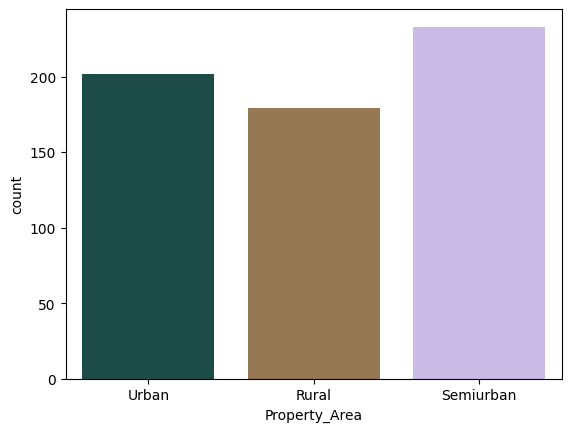

In [17]:
sns.countplot(x="Property_Area", data=df, palette="cubehelix")
plt.show()

In [18]:
df.Loan_Status.value_counts(dropna=False)

Y    422
N    192
Name: Loan_Status, dtype: int64

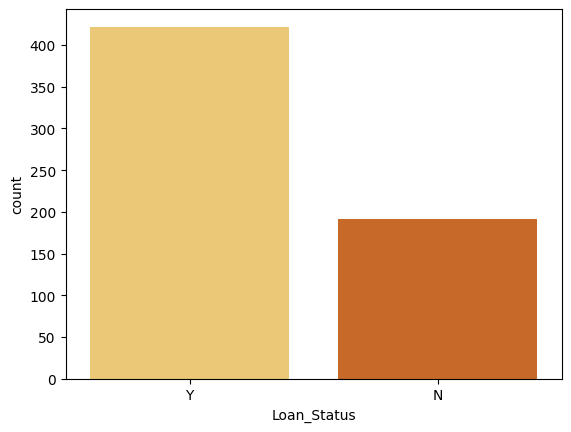

In [19]:
sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")
plt.show()

In [20]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


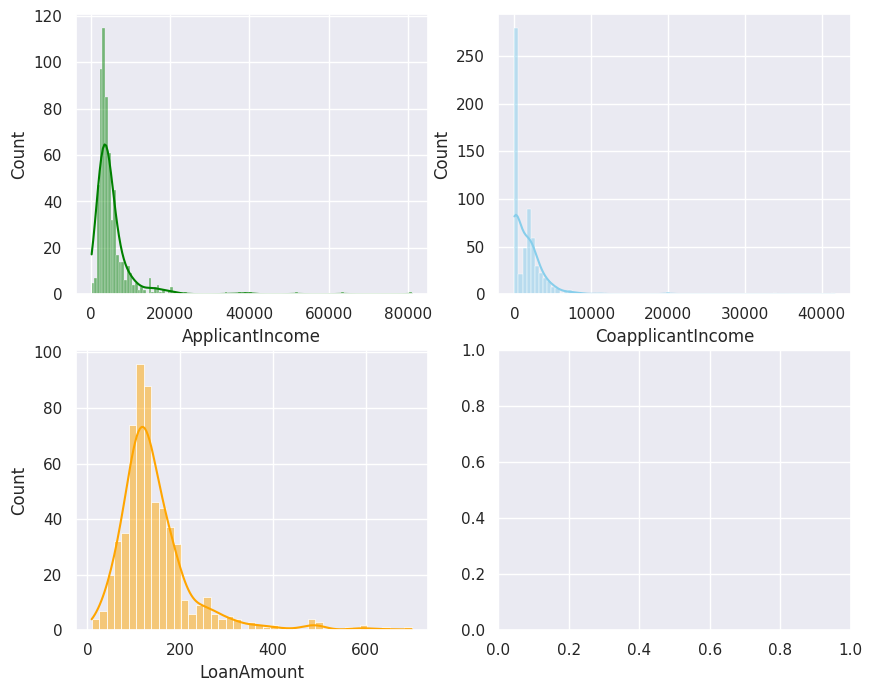

In [21]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

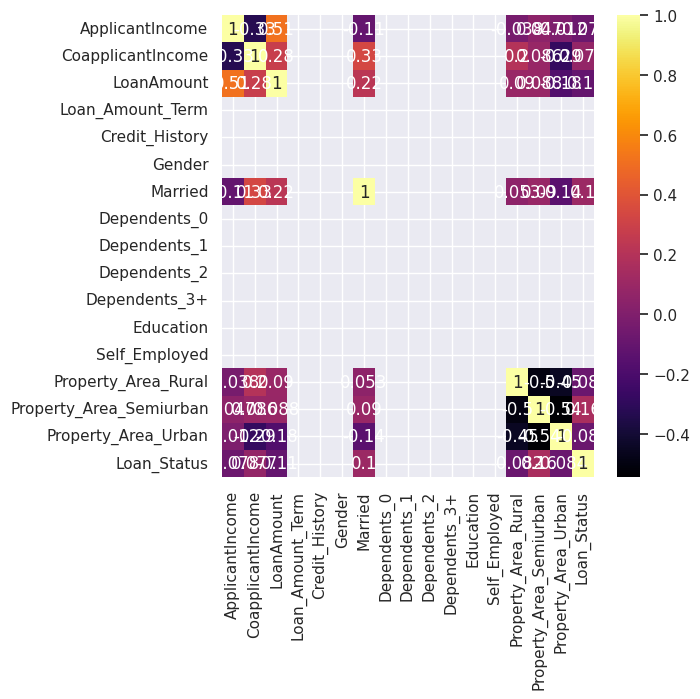

In [57]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), annot=True, cmap='inferno');

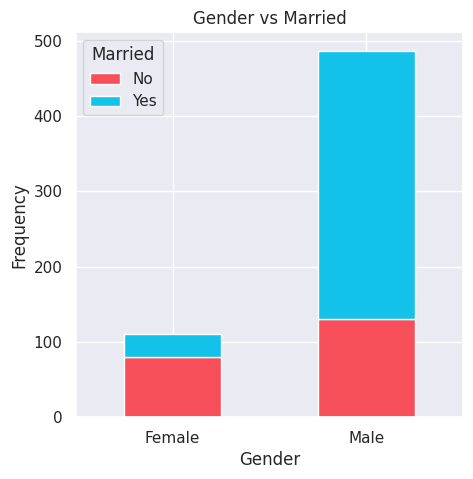

In [23]:
pd.crosstab(df.Gender,df.Married).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

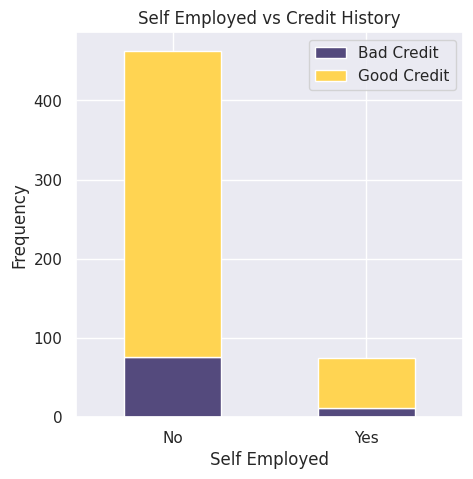

In [24]:
pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['#544a7d','#ffd452'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

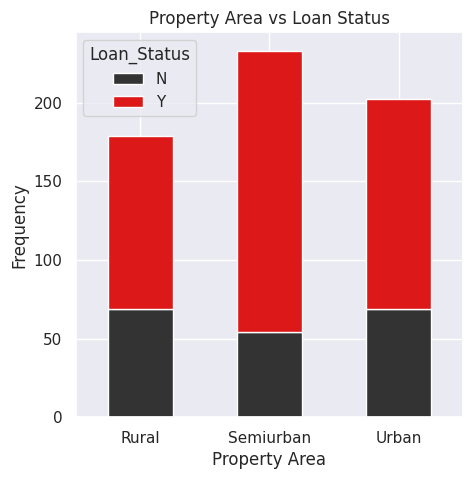

In [25]:
pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

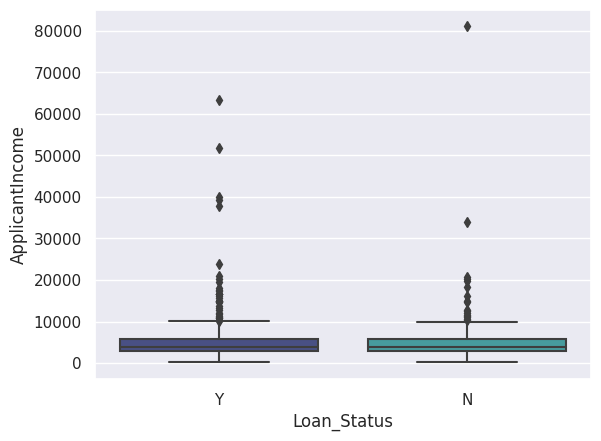

In [26]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="mako");

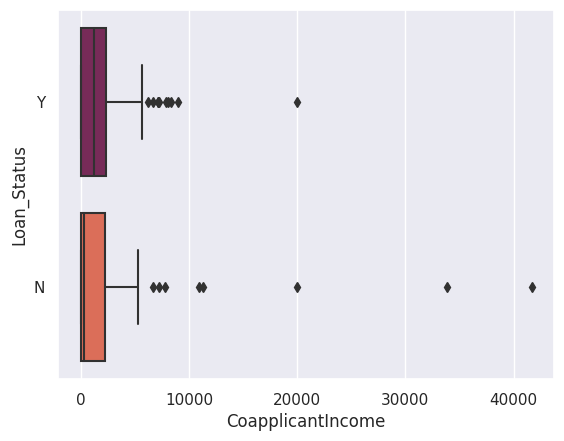

In [27]:
sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=df, palette="rocket");

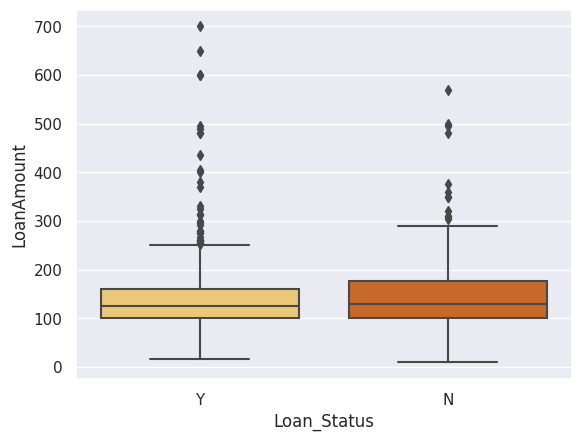

In [28]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=df, palette="YlOrBr");

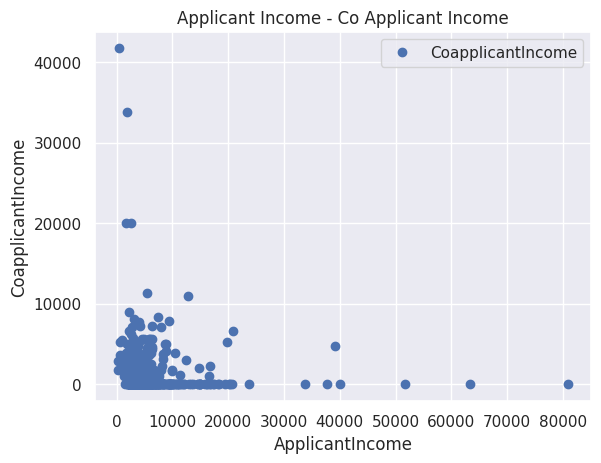

Pearson correlation: -0.11660458122889966
T Test and P value: 
 TtestResult(statistic=13.835753259915665, pvalue=1.460983948423972e-40, df=1226.0)


In [29]:
df.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o')
plt.title('Applicant Income - Co Applicant Income')
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')
plt.show()
print('Pearson correlation:', df['ApplicantIncome'].corr(df['CoapplicantIncome']))
print('T Test and P value: \n', stats.ttest_ind(df['ApplicantIncome'], df['CoapplicantIncome']))

In [30]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
df = df.drop(['Loan_ID'], axis = 1)

In [32]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [33]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [34]:
df = pd.get_dummies(df)

df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate',
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married',
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}

df.rename(columns=new, inplace=True)

In [35]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [36]:
df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

In [37]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,76.478755,0.000000,12.100089,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
4,77.459667,0.000000,11.874342,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
13,43.046487,53.291650,10.677078,360.0,1.0,1,0,1,0,0,0,1,0,1,0,0,0
15,70.356236,0.000000,11.180340,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
19,50.990195,59.160798,10.723805,360.0,1.0,1,1,1,0,0,0,1,0,0,0,1,1


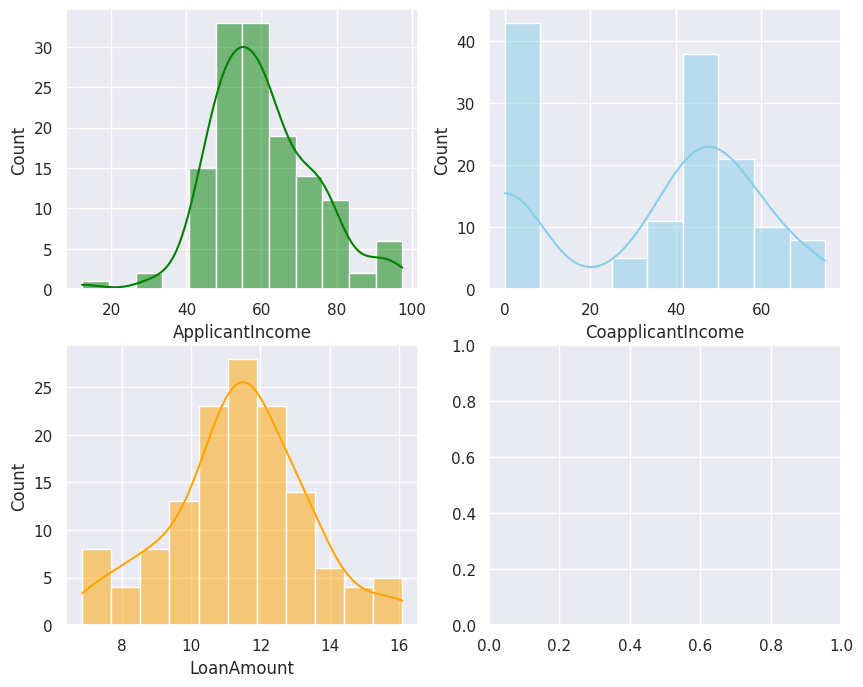

In [38]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

In [39]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

In [40]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,76.478755,0.000000,12.100089,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1
4,77.459667,0.000000,11.874342,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1
13,43.046487,53.291650,10.677078,360.0,1.0,1,0,1,0,0,0,1,0,1,0,0
15,70.356236,0.000000,11.180340,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1
19,50.990195,59.160798,10.723805,360.0,1.0,1,1,1,0,0,0,1,0,0,0,1


In [41]:
X, y = SMOTE().fit_resample(X, y)

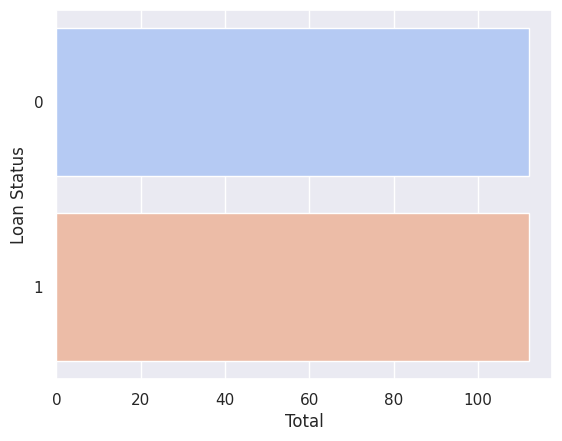

In [42]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=df, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

In [43]:
X = MinMaxScaler().fit_transform(X)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Liner Regression

In [62]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [66]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared:", r2)
print("Mean Squared Error:", mse)


R-squared: 0.5215097118133702
Mean Squared Error: 0.1195634991715727


## Logistic Regression

In [47]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        23
           1       0.82      0.82      0.82        22

    accuracy                           0.82        45
   macro avg       0.82      0.82      0.82        45
weighted avg       0.82      0.82      0.82        45

[[19  4]
 [ 4 18]]
LR accuracy: 82.22%


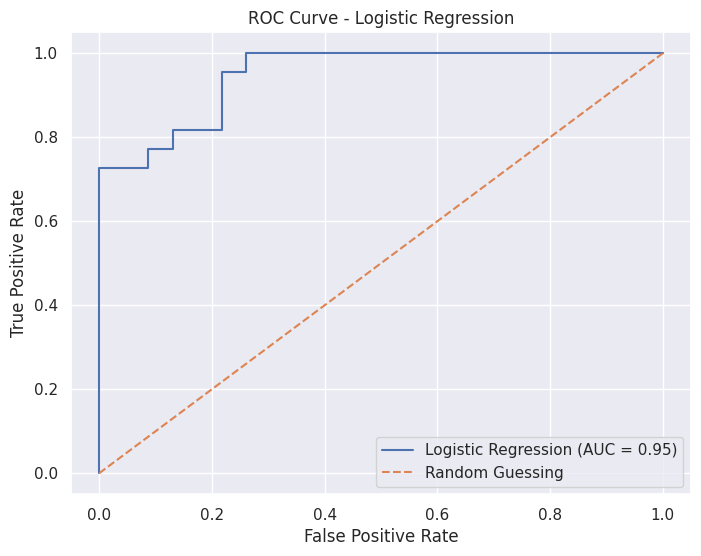

In [48]:
LR_probs = LRclassifier.predict_proba(X_test)
LR_probs = LR_probs[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, LR_probs)

auc = roc_auc_score(y_test, LR_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

## K-Nearest Neighbour (KNN)

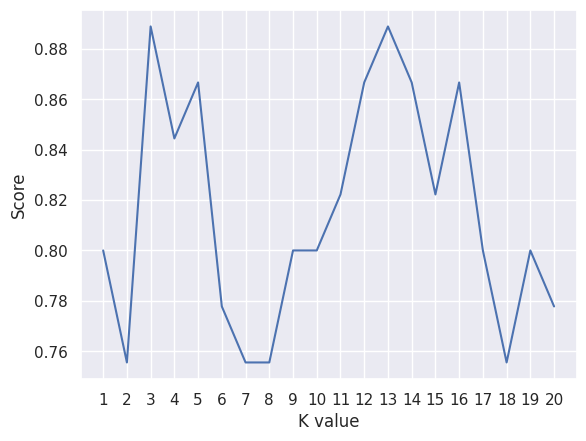

KNN best accuracy: 88.89%


In [49]:
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))

plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

## Support Vector Machine (SVM)

In [50]:
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.95      0.83      0.88        23
           1       0.84      0.95      0.89        22

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45

[[19  4]
 [ 1 21]]
SVC accuracy: 88.89%


## Random Forest

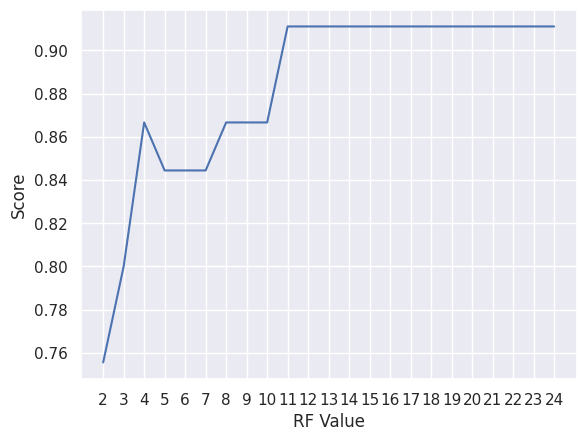

Random Forest Accuracy:  91.11%


In [51]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))

plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

Decision Tree

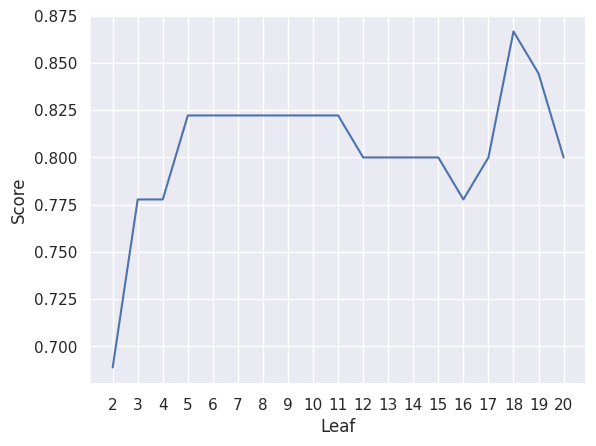

Decision Tree Accuracy: 86.67%


In [52]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))

plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

In [67]:
model_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine', 'Random Forest', 'Decision Tree']

accuracy_scores = [LRAcc * 100, KNAcc * 100, SVCAcc * 100, RFAcc * 100, DTAcc * 100]

precision_scores = [
    precision_score(y_test, LRclassifier.predict(X_test), average='weighted') * 100,
    precision_score(y_test, KNclassifier.predict(X_test), average='weighted') * 100,
    precision_score(y_test, SVCclassifier.predict(X_test), average='weighted') * 100,
    precision_score(y_test, RFclassifier.predict(X_test), average='weighted') * 100,
    precision_score(y_test, DTclassifier.predict(X_test), average='weighted') * 100
]
confusion_matrices = [
    confusion_matrix(y_test, LRclassifier.predict(X_test)),
    confusion_matrix(y_test, KNclassifier.predict(X_test)),
    confusion_matrix(y_test, SVCclassifier.predict(X_test)),
    confusion_matrix(y_test, RFclassifier.predict(X_test)),
    confusion_matrix(y_test, DTclassifier.predict(X_test))
]

summary_table = pd.DataFrame({
    'Model Name': model_names,
    'Accuracy (%)': accuracy_scores,
    'Precision (%)': precision_scores,
    'Confusion Matrix': confusion_matrices
})

print(summary_table)

               Model Name  Accuracy (%)  Precision (%)    Confusion Matrix
0     Logistic Regression     82.222222      82.222222  [[19, 4], [4, 18]]
1     K-Nearest Neighbors     88.888889      77.955556  [[19, 4], [6, 16]]
2  Support Vector Machine     88.888889      89.622222  [[19, 4], [1, 21]]
3           Random Forest     91.111111      91.422222  [[22, 1], [3, 19]]
4           Decision Tree     86.666667      81.470588  [[21, 2], [7, 15]]


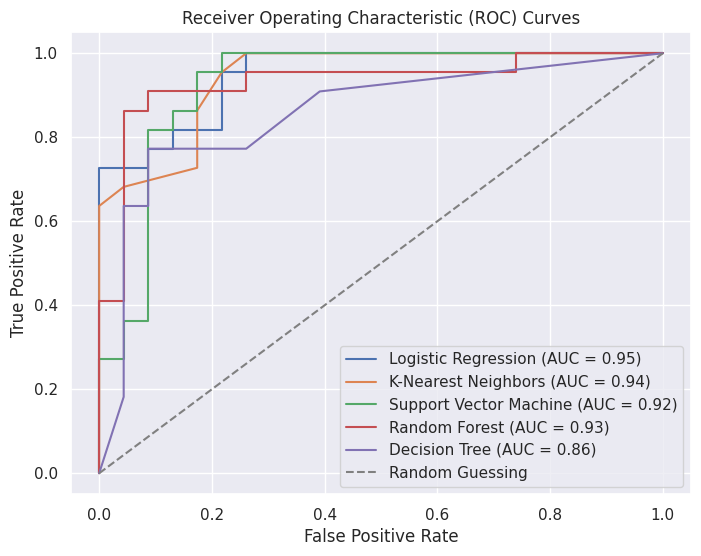

In [58]:
from sklearn.metrics import roc_curve, roc_auc_score
classifiers = [LRclassifier, KNclassifier, SVCclassifier, RFclassifier, DTclassifier]
classifier_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine', 'Random Forest', 'Decision Tree']

plt.figure(figsize=(8, 6))

for clf, name in zip(classifiers, classifier_names):
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:
        prob_pos = clf.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, prob_pos)
    auc = roc_auc_score(y_test, prob_pos)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.grid(True)
plt.show()

ANN

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Epoch 1/10
5/5 [==============================] - 1s 57ms/step - loss: 0.7087 - accuracy: 0.4615 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 2/10
5/5 [==============================] - 0s 11ms/step - loss: 0.6943 - accuracy: 0.5385 - val_loss: 0.6845 - val_accuracy: 0.6389
Epoch 3/10
5/5 [==============================] - 0s 12ms/step - loss: 0.6830 - accuracy: 0.6154 - val_loss: 0.6770 - val_accuracy: 0.7778
Epoch 4/10
5/5 [==============================] - 0s 12ms/step - loss: 0.6732 - accuracy: 0.6993 - val_loss: 0.6685 - val_accuracy: 0.8056
Epoch 5/10
5/5 [==============================] - 0s 12ms/step - loss: 0.6632 - accuracy: 0.7343 - val_loss: 0.6600 - val_accuracy: 0.8056
Epoch 6/10
5/5 [==============================] - 0s 15ms/step - loss: 0.6544 - accuracy: 0.7413 - val_loss: 0.6524 - val_accuracy: 0.8056
Epoch 7/10
5/5 [==============================] - 0s 16ms/step - loss: 0.6459 - accuracy: 0.7343 - val_loss: 0.6445 - val_accuracy: 0.8056
Epoch 8/10
5/5 [===========

In [55]:
def get_user_input():
    print("Enter the required features for loan prediction:")
    try:
        applicant_income = float(input("Applicant's Income: "))
        coapplicant_income = float(input("Coapplicant's Income: "))
        loan_amount = float(input("Loan Amount: "))
        loan_amount_term = float(input("Loan Amount Term (in months): "))
        credit_history = float(input("Credit History (1 for Yes, 0 for No): "))
        gender = int(input("Gender (1 for Male, 0 for Female): "))
        married = int(input("Married (1 for Yes, 0 for No): "))
        dependents1 = int(input("Number of Dependent: "))
        dependents2 = int(input("Number of Dependent: "))
        dependents3 = int(input("Number of Dependent: "))
        dependents4 = int(input("Number of Dependent: "))
        education = int(input("Education (1 for Graduate, 0 for Not Graduate): "))
        self_employed = int(input("Self Employed (1 for Yes, 0 for No): "))
        property_area_rural = int(input("Property Area - Rural (1 for Yes, 0 for No): "))
        property_area_semiurban = int(input("Property Area - Semiurban (1 for Yes, 0 for No): "))
        property_area_urban = int(input("Property Area - Urban (1 for Yes, 0 for No): "))

        return np.array([[applicant_income, coapplicant_income, loan_amount, loan_amount_term, credit_history,
                          gender, married, dependents1,dependents2,dependents3,dependents4, education, self_employed, property_area_rural,
                          property_area_semiurban, property_area_urban]])

    except ValueError:
        print("Invalid input. Please enter numeric values where required.")
        return None

def predict_loan_status(user_input):
    if user_input is None:
        return None

    KNclassifier = KNeighborsClassifier(n_neighbors=5)
    KNclassifier.fit(X_train, y_train)

    prediction = KNclassifier.predict(user_input)

    return prediction

user_features = get_user_input()

prediction = predict_loan_status(user_features)

if prediction is not None:
    if prediction[0] == 1:
        print("Loan Status:Paid")
    else:
        print("Loan Status: Not Paid")

Enter the required features for loan prediction:
Applicant's Income: 3243
Coapplicant's Income: 2323
Loan Amount: 12323
Loan Amount Term (in months): 234
Credit History (1 for Yes, 0 for No): 1
Gender (1 for Male, 0 for Female): 0
Married (1 for Yes, 0 for No): 1
Number of Dependent: 1
Number of Dependent: 0
Number of Dependent: 1
Number of Dependent: 0
Education (1 for Graduate, 0 for Not Graduate): 1
Self Employed (1 for Yes, 0 for No): 0
Property Area - Rural (1 for Yes, 0 for No): 0
Property Area - Semiurban (1 for Yes, 0 for No): 0
Property Area - Urban (1 for Yes, 0 for No): 1
Loan Status: Not Paid
